# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

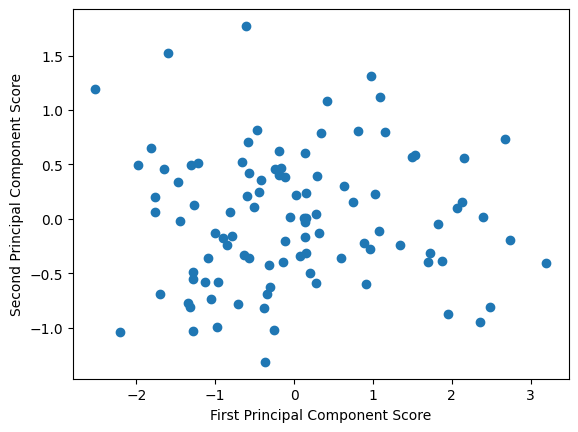

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [2]:
# Heat map of the insurance_claims dataset
df_ins = pd.read_csv('data/insurance_claims.csv')
pd.set_option('display.max_columns', None)
df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df_ins.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
# Drop the _c39 column
df_ins = df_ins.drop(columns='_c39')

In [6]:
# Impute the NaN values with "No authorities contacted"
df_ins['authorities_contacted'] = df_ins['authorities_contacted'].fillna("No authorities contacted")
df_ins['authorities_contacted'].value_counts()

authorities_contacted
Police                      292
Fire                        223
Other                       198
Ambulance                   196
No authorities contacted     91
Name: count, dtype: int64

In [7]:
# Convert Fraud Reported to Int
df_ins['fraud_reported'] = df_ins['fraud_reported'].replace({'Y': 1, 'N': 0})

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_33492\2896432893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ins['fraud_reported'] = df_ins['fraud_reported'].replace({'Y': 1, 'N': 0})


In [8]:
# Import seaborn library
import seaborn as sns

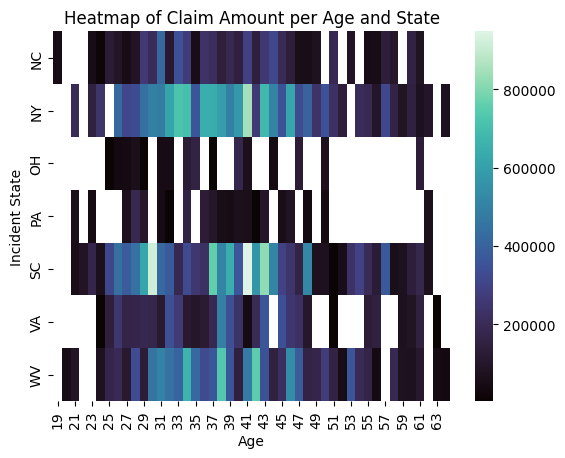

In [9]:
# Heatmap
pivot = df_ins.pivot_table(index = ["incident_state"], columns = ["age"], values = "total_claim_amount", aggfunc = "sum")
sns.heatmap(data=pivot, cmap='mako')
plt.title('Heatmap of Claim Amount per Age and State')
plt.ylabel('Incident State')
plt.xlabel('Age')
None

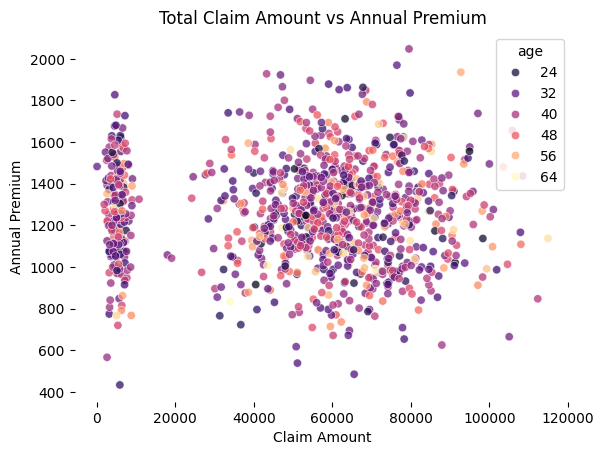

In [10]:
# Bubble Plot
sns.scatterplot(data=df_ins, x='total_claim_amount', y='policy_annual_premium', hue='age', palette='magma', alpha=.75)
sns.despine(left=True, bottom=True)
plt.title("Total Claim Amount vs Annual Premium")
plt.xlabel('Claim Amount')
plt.ylabel('Annual Premium')
None

In [11]:
# Remove useless columns for analysis
useless_cols = ['policy_bind_date', 'incident_date', 'incident_location']
df_clean = df_ins.drop(columns=useless_cols)
df_clean.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,No authorities contacted,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [12]:
# Encode all categorical cols
cat_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model']

df_clean = pd.get_dummies(data=df_clean, columns=cat_cols)

In [13]:
# PCA analysis
pca = decomposition.PCA(n_components = 3)
pca.fit(df_clean)
print(f"The first principle component explains {pca.explained_variance_ratio_[0]} of the variance.")
print("--------------------------------------------------------------------------")
print("Below are the vectors for all three components:")
print(pca.components_)

The first principle component explains 0.9861958814109959 of the variance.
--------------------------------------------------------------------------
Below are the vectors for all three components:
[[ 7.76871532e-07  7.21422482e-08  1.01614818e-03  2.89458456e-06
  -6.63575902e-07  9.99998923e-01  6.14563497e-04 -5.73526521e-04
  -2.94303712e-04 -7.03734648e-08 -9.43334610e-09  8.11839122e-09
  -3.25987292e-09 -4.63752516e-04 -9.64954302e-05 -4.99774551e-05
  -3.17279630e-04  2.59049577e-08  1.10090894e-08  6.41999467e-09
  -2.14388299e-09 -4.27611168e-09 -6.87650721e-09  6.17482682e-09
   7.01680394e-10 -2.32082259e-09  2.32082259e-09 -3.12039870e-10
   1.64708296e-09  5.38191977e-10  1.84654000e-09  3.50070948e-09
  -4.63536986e-09 -2.58511470e-09 -8.65436412e-10 -1.13248393e-09
   2.56561915e-09 -2.59338242e-09 -2.53194502e-09 -2.93137192e-09
  -1.21320055e-09  2.81228375e-09  3.76061592e-09 -2.57536248e-09
   1.25871902e-09  1.38904847e-09  4.38505308e-09 -2.32815665e-09
   9.48596

In [14]:
# convert all bool features to int
bools = df_clean.select_dtypes(include=bool).columns
df_clean[bools] = df_clean[bools].astype(int)
df_clean

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_No authorities contacted,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [15]:
import json

# linear regression prediction on all columns
def predict(df):
    
    # dictionary to store mse values
    dict = {}

    # loop through columns in df
    for col in df.columns:
        
        # Separate data into features and target
        X = df.drop(col, axis=1)
        y = df[col]

        # initialize the linear Regression model
        linreg = LinearRegression()
        linreg.fit(X,y)
        pred = linreg.predict(X)

        # calculate the mse
        mse = metrics.root_mean_squared_error(pred, y)

        # Add value to dictionary
        dict[col] = mse

    # Grab top 5 values from dictionary
    top_5 = sorted(dict.items(), key=lambda item: item[1], reverse=False)[:5]

    return top_5

In [16]:
# Print the top5 MSE's from the clean dataframe
print(f"Top 5 MSE values in the df_clean dataframe:")
print("-------------------------------------------")
print(json.dumps(predict(df_clean), indent=2))

Top 5 MSE values in the df_clean dataframe:
-------------------------------------------
[
  [
    "auto_model_Accord",
    6.327153208508487e-12
  ],
  [
    "incident_state_SC",
    9.011799157680375e-12
  ],
  [
    "auto_model_Escape",
    9.181147037356527e-12
  ],
  [
    "auto_make_Suburu",
    1.252713661072221e-11
  ],
  [
    "auto_make_Saab",
    1.3077219292600932e-11
  ]
]


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

In [18]:
# recreate the Distribution by customer segment
categories = ["US Population", "Our Customers"]
segments = [f"Segment {x}" for x in range(1,8)]
values = np.array([
    [.16,.07,.1,.1,.1,.32,.15],  # US Population distribution
    [.09,.1,.15,.18,.17,.2,.11]
]).T
frame = pd.DataFrame(data=values, columns=categories, index=segments)
frame

,US Population,Our Customers
Segment 1,0.16,0.09
Segment 2,0.07,0.10
Segment 3,0.10,0.15
Segment 4,0.10,0.18
Segment 5,0.10,0.17
Segment 6,0.32,0.20
Segment 7,0.15,0.11


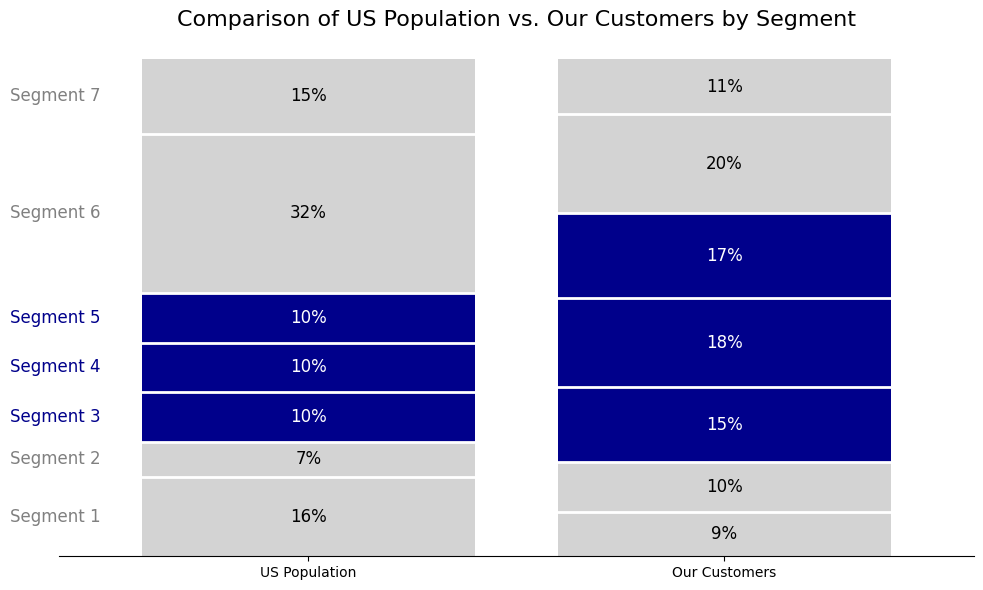

In [ ]:
segment_colors = {
    "Segment 1": "lightgray",
    "Segment 2": "lightgray",
    "Segment 3": "darkblue",
    "Segment 4": "darkblue",
    "Segment 5": "darkblue",
    "Segment 6": "lightgray",
    "Segment 7": "lightgray"
}
segment_colors_customers = {
    "Segment 1": "lightgray",
    "Segment 2": "lightgray",
    "Segment 3": "darkblue",
    "Segment 4": "darkblue",
    "Segment 5": "darkblue",
    "Segment 6": "lightgray",
    "Segment 7": "lightgray"
}

fig, ax = plt.subplots(figsize=(10, 6))

bottom_us = 0
bottom_customers = 0

# Plot and annotate each segment with dividers and value labels
for i, segment in enumerate(segments):
    us_val = frame.loc[segment, "US Population"]
    cust_val = frame.loc[segment, "Our Customers"]
    
    # Plot US Population bar segment
    ax.bar("US Population", us_val, bottom=bottom_us, color=segment_colors[segment])
    # Add segment name label (to the left of the bar)
    ax.text(0 - 0.5, bottom_us + us_val / 2, segment,
            va='center', ha='right', fontsize=12, 
            color="gray" if segment_colors[segment] != "darkblue" else "darkblue")
    # Add value label
    ax.text(0, bottom_us + us_val / 2, f"{us_val*100:.0f}%",
            va='center', ha='center', fontsize=12, 
            color="black" if segment_colors[segment] != "darkblue" else "white")
    bottom_us += us_val
    # Add divider if not the last segment
    if i < len(segments) - 1:
        ax.plot([-0.4, 0.4], [bottom_us, bottom_us], color='white', linewidth=2)
    
    # Plot Our Customers bar segment
    ax.bar("Our Customers", cust_val, bottom=bottom_customers, color=segment_colors_customers[segment])
    # Add value label
    ax.text(1, bottom_customers + cust_val / 2, f"{cust_val*100:.0f}%",
            va='center', ha='center', fontsize=12, 
            color="black" if segment_colors_customers[segment] != "darkblue" else "white")
    bottom_customers += cust_val
    # Add divider if not the last segment
    if i < len(segments) - 1:
        ax.plot([0.6, 1.4], [bottom_customers, bottom_customers], color='white', linewidth=2)

# Final chart formatting
ax.set_title("Comparison of US Population vs. Our Customers by Segment", fontsize=16)
ax.set_xticks([0, 1])
ax.set_xticklabels(["US Population", "Our Customers"])
ax.set_xlim(-0.6, 1.6)
ax.get_yaxis().set_visible(False)

# Despine the chart (remove spines)
ax.spines[["top", "right", "left"]].set_visible(False)

plt.tight_layout()
plt.show()
